In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import soundfile as sf
import librosa as lb
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
from numpy import hamming
#from numpy import FrameBlocks

data, fs = sf.read('/content/drive/MyDrive/Colab Notebooks/should.wav')
print(data, fs)

[0.00039673 0.00045776 0.00012207 ... 0.00082397 0.00033569 0.00018311] 10000


In [3]:
print('Sampling Frequency: ', fs)

Sampling Frequency:  10000


In [4]:
import IPython.display as ipd
ipd.Audio(data, rate=10000, autoplay=True)

In [5]:
from scipy.linalg import solve_toeplitz, toeplitz

def Levinson(w_sig,p):
    r_list = [Autocor(w_sig,i) for i in range(p)]
    b_list = [Autocor(w_sig,i) for i in range(1,p+1)]
    LPC = solve_toeplitz((r_list,r_list),b_list)
    return LPC

In [6]:
import scipy
def Autocor(signal, k):

    if k == 0:
        return np.sum(signal**2)
    else:
        return np.sum(signal[k:]*signal[:-k])

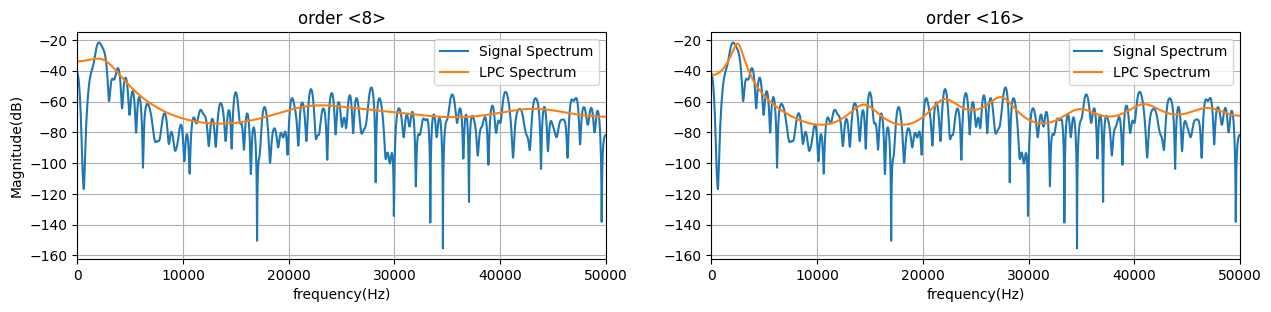

2048
[-0.93084739 -0.93080554 -0.93067998 ... -1.5027438  -1.50280982
 -1.50284945]


In [7]:
def Lpcspectrum(signal, window, sr, *p_): 
    plt.figure(figsize=(15,3),dpi = 100)
    win_sig = signal*window
    for i,p in enumerate(p_):
        plt.subplot(1,len(p_),i+1)
        LPC = Levinson(win_sig, p)
        LPC = np.insert(-LPC, 0, 1)
        value = 0 
        axis = np.linspace(0,sr/2,2048)
        w2,h2 = scipy.signal.freqz([0.04], LPC, worN=2048, fs = sr)
        S_fft = np.fft.rfft(win_sig,4096)
        plt.plot(axis,20*np.log(abs(S_fft[1:])),label = 'Signal Spectrum')  
        plt.plot(axis,20*np.log(abs(h2)),label = 'LPC Spectrum')
        plt.xlim(0,sr/2)
        plt.xlabel('frequency(Hz)')
        if i== 0:
            plt.ylabel('Magnitude(dB)')
        plt.title('order <{}>'.format(p))
        plt.legend()
        plt.grid(True)
        

    plt.show()
    h1 = np.log10(abs(h2))
    print(len(h1))
    print(h1)
    return np.array(h1)
l = len(data)
pt = Lpcspectrum(data[:360], np.hamming(360),100000,8,16)

In [8]:
peak = lb.util.peak_pick(pt,3,3,3,5,0.5,10)
peak

array([], dtype=float64)